#                                            **TELECOM CUSTOMER CHURN PREDICTION**

## **Project Cycle:**

1. **Check data quality (Missing & Duplicates)** - Reviewed data types, and verify if it is correct. Also check for missing & duplicate values.

2. **Univariate analysis** — In this step, I went through each column individually to identify and address any issues, and performed EDA to gain a deeper understanding of the features.

3. **Bivariate analysis** — Explored the relationship between each feature and the target variable (Churn) to discover useful patterns.

4. **Multivariate analysis** — Analyzed how multiple features interact together and how they collectively affect churn.

5. **Feature extraction** — Created new features from existing ones to improve the model’s learning capability and overall performance.

6. **Feature importance** — Used correlation and ExtraTreesClassifier to identify the most important features for the model, and removed less impactful ones.

7. **ML Pipelines** —Built separate pipelines for categorical and numerical data to handle missing values, encoding, scaling, and class imbalance automatically — ensuring a clean, repeatable workflow.

8. **Model training** — Trained several machine learning models using cross-validation and pipelines to prevent data leakage and evaluate consistent performance.

9. **Choose best model** — Selected **Random Forest** as the best model based on performance metrics.

10. **Tuning** — Optimized the Random Forest hyperparameters using **GridSearchCV**, achieving **98% accuracy, 85% recall, and 98% precision**.

11. **Deployment** — Deployed the final model using **Streamlit** for real-time churn prediction.




In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [61]:
import plotly.io as pio
pio.renderers.default = 'svg'

## Combining 2 DataFrames for Univariate & Bivariate Analysis and Data Cleaning , will split them in modelling by Cross validation + Pipline

In [62]:
df_Train = pd.read_csv('/Users/mohammedmahmood/Desktop/Data projects/Projects/Data science/Telecom_Churn_App/data/churn-bigml-80.csv')
df_Test = pd.read_csv('/Users/mohammedmahmood/Desktop/Data projects/Projects/Data science/Telecom_Churn_App/data/churn-bigml-20.csv')

df = pd.concat([df_Train, df_Test], ignore_index=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
# Add underscores to column names
df.columns = df.columns.str.replace(' ', '_')

In [64]:
# some info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [65]:
df.shape

(3333, 20)

In [66]:
df.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Check Nulls

In [67]:
# Nulls
df.isna().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

##  Duplicate

In [68]:
df.duplicated().sum()

np.int64(0)

# Univariate analysis
### In this step I will go through each column individually to identify and address any issues, and do EDA to gain a deeper understanding of the features.

In [69]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

## State

In [70]:
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [71]:
df.State.value_counts()

State
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

## Account_length

In [72]:
df.Account_length.value_counts()

Account_length
105    43
87     42
93     40
101    40
90     39
       ..
188     1
4       1
200     1
8       1
175     1
Name: count, Length: 212, dtype: int64

In [73]:
df.Account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account_length, dtype: float64

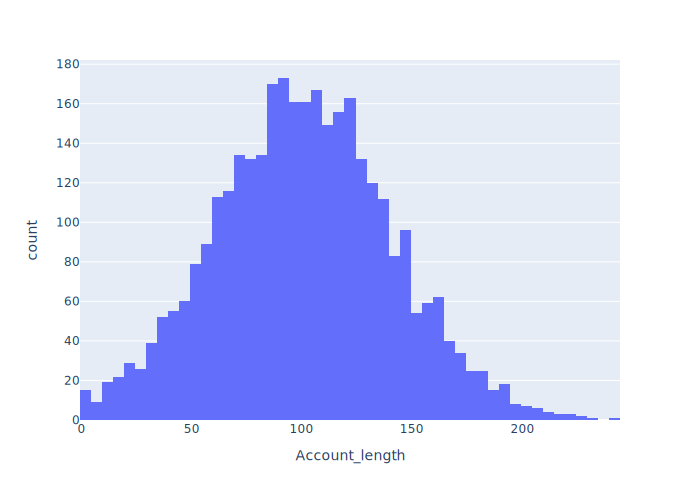

In [74]:
px.histogram(df , x= "Account_length" )

## Area_code

In [75]:
df.Area_code.unique()

array([415, 408, 510])

In [76]:
df.Area_code.value_counts()

Area_code
415    1655
510     840
408     838
Name: count, dtype: int64

In [77]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

## International_plan

In [78]:
df.International_plan.unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df.International_plan.value_counts()

International_plan
No     3010
Yes     323
Name: count, dtype: int64

## Voice_mail_plan

In [80]:
df.Voice_mail_plan.unique()

array(['Yes', 'No'], dtype=object)

## Number_vmail_messages

In [81]:
df.Number_vmail_messages.unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 41, 28, 30, 34, 46, 35, 21, 42, 36,
       22, 23, 43, 31, 38, 40, 29, 18, 32, 17, 45, 16, 14, 20, 19, 15, 12,
       47,  8, 44,  4, 10, 13, 50,  9, 48, 51, 11, 49])

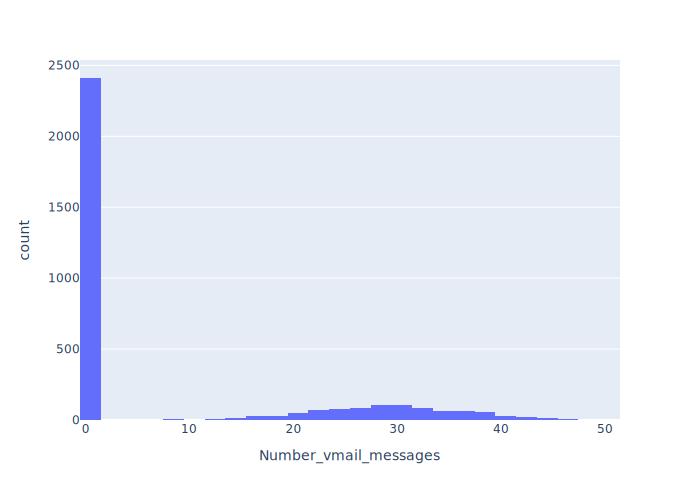

In [82]:
px.histogram(df, x= "Number_vmail_messages" )

## Total_day_minutes

In [83]:
df.Total_day_minutes.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total_day_minutes, dtype: float64

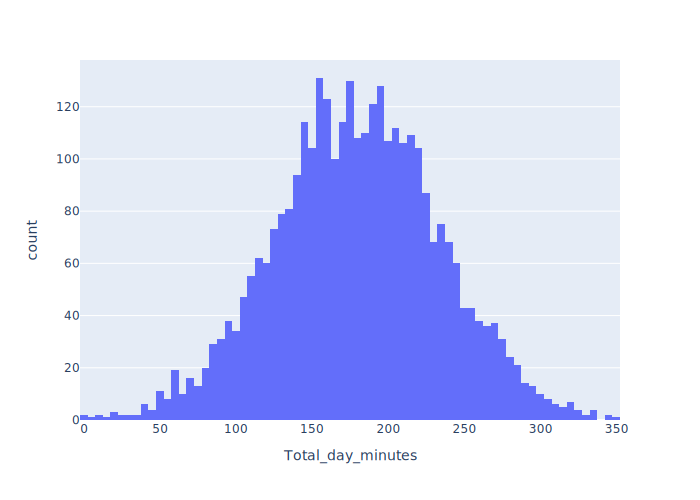

In [84]:
px.histogram(df, x= "Total_day_minutes")

In [85]:
df.columns


Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

## Total_day_calls

In [86]:
df.Total_day_minutes.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total_day_minutes, dtype: float64

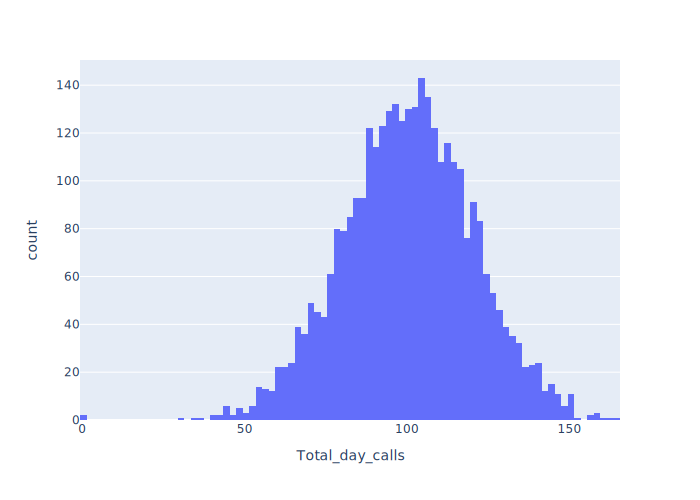

In [87]:
px.histogram(df, x= "Total_day_calls")

## Total_eve_minutes

In [88]:
df.Total_day_minutes.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total_day_minutes, dtype: float64

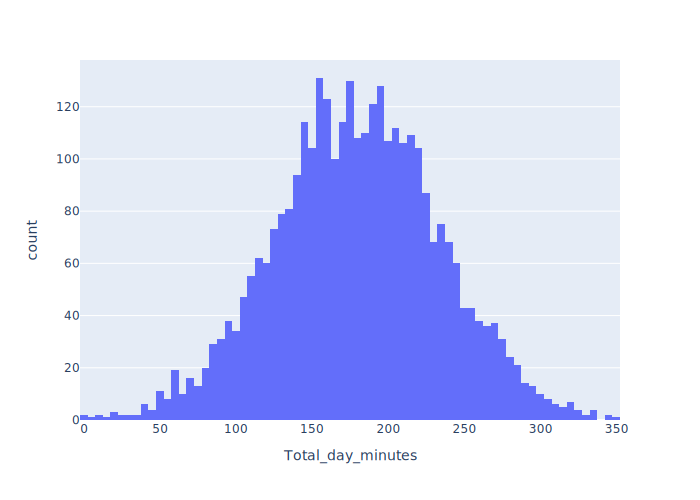

In [89]:
px.histogram(df, x= "Total_day_minutes")

## Total_eve_calls

In [90]:
df.Total_eve_calls.value_counts()

Total_eve_calls
105    80
94     79
108    71
97     70
102    70
       ..
49      1
156     1
36      1
45      1
37      1
Name: count, Length: 123, dtype: int64

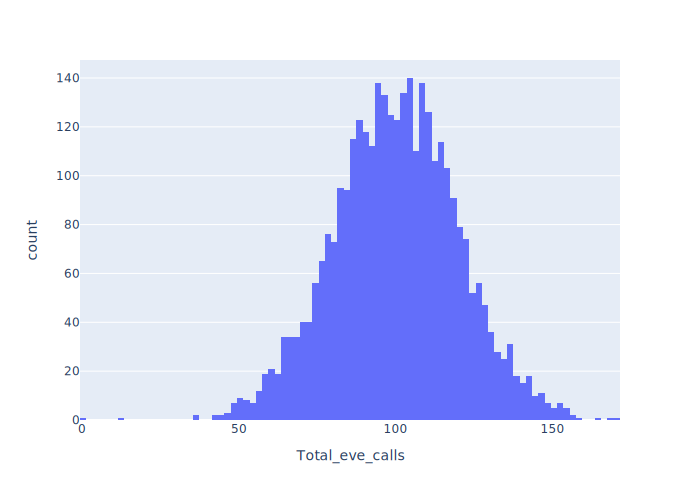

In [91]:
px.histogram(df, x= "Total_eve_calls")

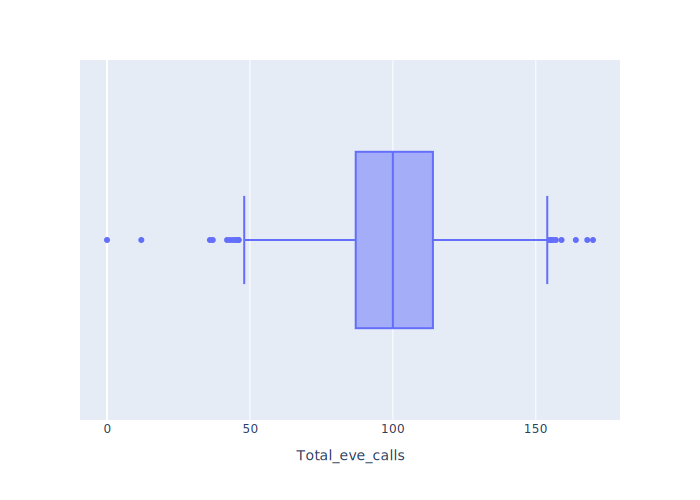

In [92]:
px.box(df, x= "Total_eve_calls")

In [93]:
df.Total_eve_calls.describe()

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total_eve_calls, dtype: float64

## Total_eve_charge

In [94]:
df.Total_eve_charge.describe()

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Total_eve_charge, dtype: float64

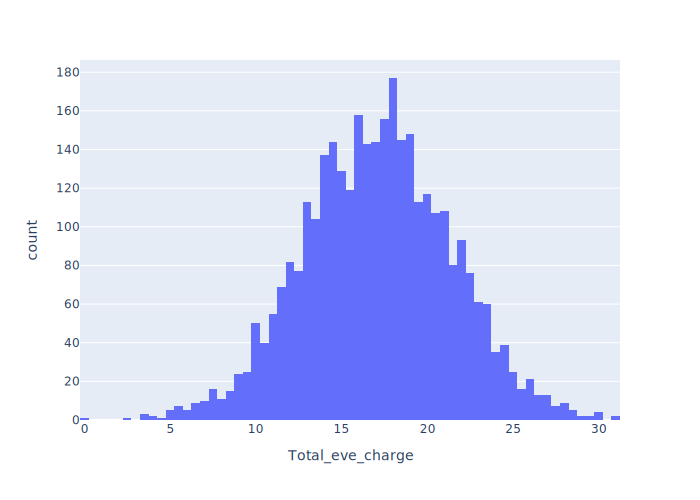

In [95]:
px.histogram(df, x= "Total_eve_charge")

In [96]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

## Total_night_minutes

In [97]:
df.Total_night_minutes.describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Total_night_minutes, dtype: float64

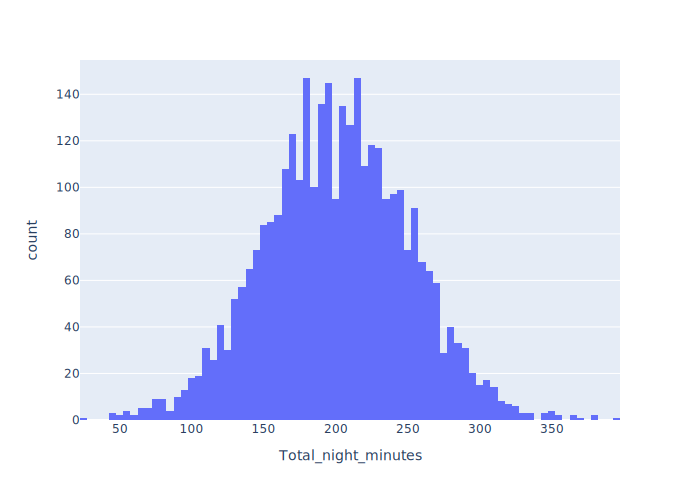

In [98]:
px.histogram(df, x= "Total_night_minutes")

## Total_night_calls

In [99]:
df.Total_night_calls.describe()

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: Total_night_calls, dtype: float64

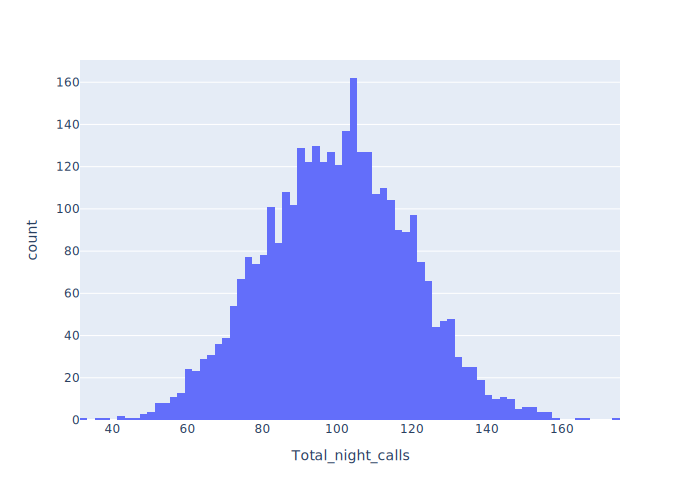

In [100]:
px.histogram(df, x= "Total_night_calls")

In [101]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

##

## Total_night_charge

In [102]:
df.Total_night_charge.describe()

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Total_night_charge, dtype: float64

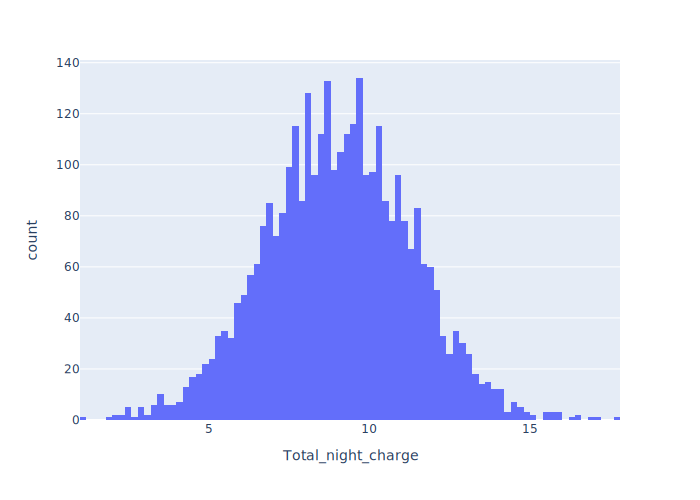

In [103]:
px.histogram(df, x= "Total_night_charge")

## Customer_service_calls

In [104]:
df.Customer_service_calls.unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [105]:
df.Customer_service_calls.value_counts()

Customer_service_calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

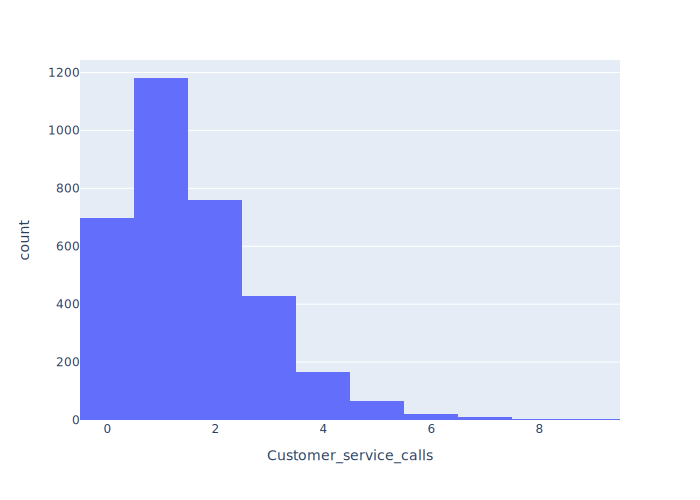

In [106]:
px.histogram(df, x= "Customer_service_calls" )

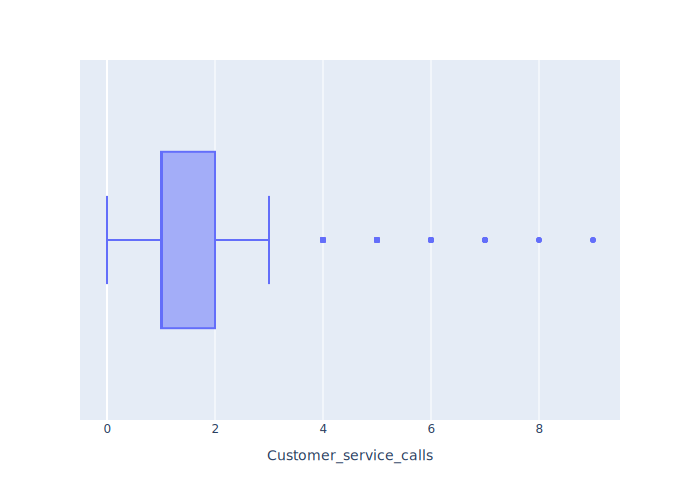

In [107]:
px.box(df, x = "Customer_service_calls" )

## Churn

In [108]:
df.Churn.unique()

array([False,  True])

In [109]:
df.Churn.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [110]:
df["Churn"] = df["Churn"].map({False :0, True :1})

### **Targe is imbalanced, and i will handle it in ml pipline**

# baivariate analysis

## 1. Customer Profile

### 1- Does churn rate vary by State?

#### **we want to know Are there specific geographic regions with higher churn?**

In [111]:
state_churn = df.groupby('State')['Churn'].count().reset_index()
state_churn.sort_values("Churn",  ascending=False, inplace= True)
state_churn.head(20)

,State,Churn
49,WV,106
23,MN,84
34,NY,83
1,AL,80
37,OR,78
48,WI,78
35,OH,78
45,VA,77
50,WY,77
6,CT,74


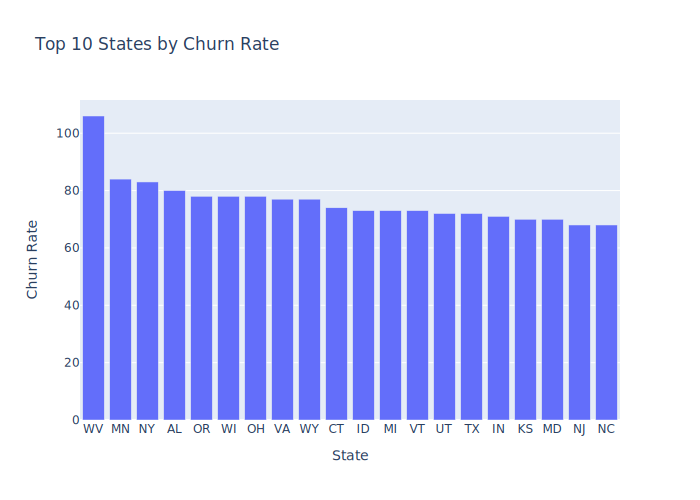

In [112]:
fig = px.bar(
    state_churn.sort_values('Churn', ascending=False).head(20),
    x='State', y='Churn',
    title="Top 10 States by Churn Rate",
    labels={'Churn': 'Churn Rate'}
)
fig.show()


#### **Insight: States like WV, MN, and NY have the highest number of churners (over 80–100 each), while states like NJ and NC are lower (~68). This shows churn volume is uneven, with some states contributing much more to total churn.**

### - 2- **Is Account_length (the period of coustomer stay in company ) significantly different for churn vs. non-churn customers?**

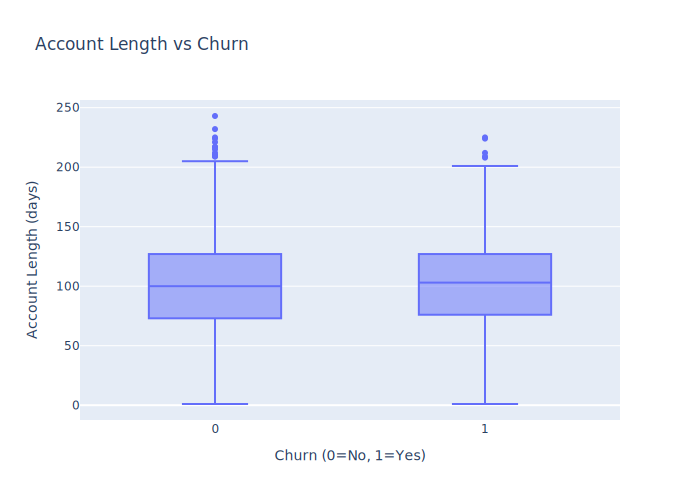

In [113]:
fig = px.box(
    df, x='Churn', y='Account_length',
    title="Account Length vs Churn",
    labels={'Churn': 'Churn (0=No, 1=Yes)', 'Account_length': 'Account Length (days)'}
)
fig.show()

### Insight: Account length looks very similar for churners and non-churners. The median and spread overlap a lot, meaning tenure alone does not explain churn.

## 2- Service Plans

### 3- Do customers with an International plan service churn more often than those without?

#### **High-value but also sensitive segment**

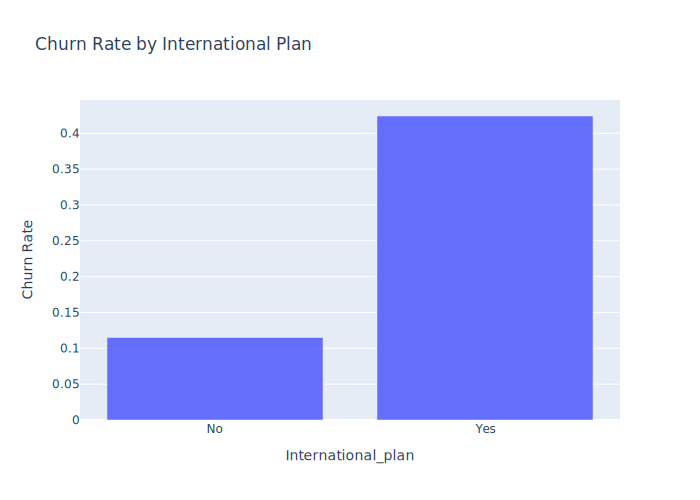

In [114]:
intl_churn = df.groupby('International_plan')['Churn'].mean().reset_index()

fig = px.bar(
    intl_churn, x='International_plan', y='Churn',
    title="Churn Rate by International Plan",
    labels={'Churn': 'Churn Rate'}
)
fig.show()


#### **- Insight**: **Customers with an International Plan churn much more (~42%) compared to those without (~11%). This shows that international users are far more likely to leave.**

#### **- Recommindation: Since international users are high-value but high-risk, the company should focus on competitive pricing, better support, or loyalty perks to reduce churn in this premium segment**

### 4- Is there a difference in churn between customers with and without a Voice_mail_plan ?

#### **Want to know Does having extra services reduce churn!**

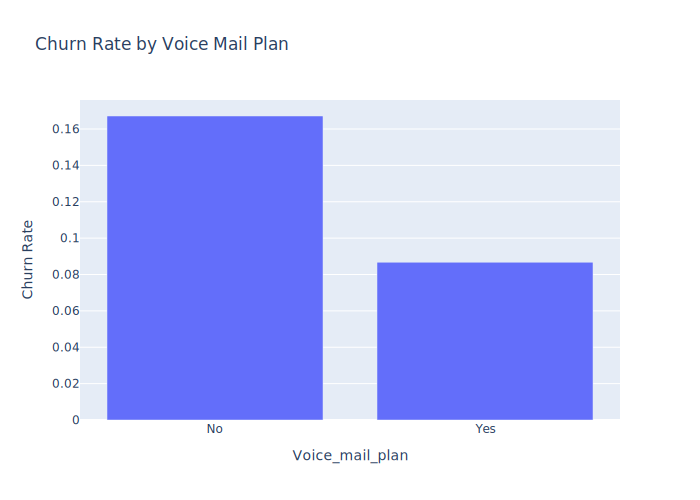

In [115]:
vm_churn = df.groupby('Voice_mail_plan')['Churn'].mean().reset_index()

fig = px.bar(
    vm_churn, x='Voice_mail_plan', y='Churn',
    title="Churn Rate by Voice Mail Plan",
    labels={'Churn': 'Churn Rate'}
)
fig.show()


### **Insight: Customers with a Voice Mail Plan churn less (~9%) compared to those without (~17%). Extra services seem to increase loyalty.**

## 3. Customer Service

### 5- How does churn rate increase with Customer_service_calls ?

#### **(want to know churn jumps after how much call!)**

In [116]:
df['Total_day_minutes'].skew()

np.float64(-0.029077067143192067)

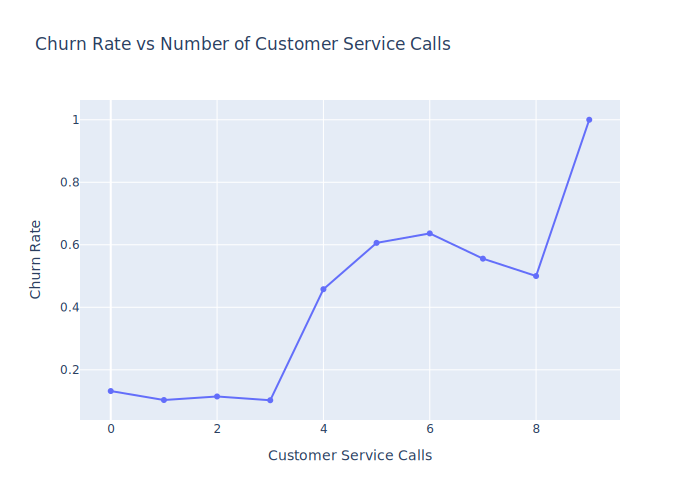

In [117]:
service_churn = df.groupby('Customer_service_calls')['Churn'].mean().reset_index()

fig = px.line(
    service_churn,
    x='Customer_service_calls',
    y='Churn',
    markers=True,
    title="Churn Rate vs Number of Customer Service Calls",
    labels={'Churn': 'Churn Rate', 'Customer_service_calls': 'Customer Service Calls'}
)
fig.show()

#### **-- Insight: Churn rate stays low for 0–2 service calls but jumps sharply after 3+ calls, reaching above 40%, and hits nearly 100% for 9 calls. High service calls are a strong signal of dissatisfaction.**


#### **-- Recomindation: Customers who call support more than 3 times should be flagged as high-risk and prioritized for fast resolution, proactive outreach, or escalation to retention teams before they leave.**

### 6- Is the effect of Customer_service_calls stronger for Intl_plan users

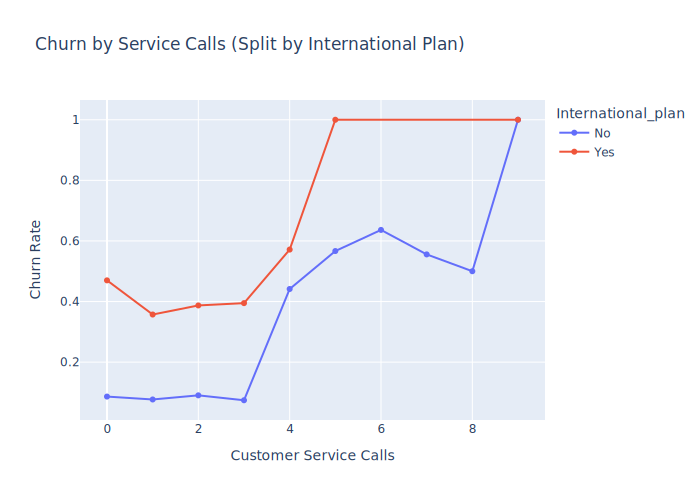

In [118]:
# Group by Intl plan and service calls
interaction = df.groupby(['International_plan', 'Customer_service_calls'])['Churn'].mean().reset_index()

fig = px.line(
    interaction,
    x='Customer_service_calls',
    y='Churn',
    color='International_plan',
    markers=True,
    title="Churn by Service Calls (Split by International Plan)",
    labels={'Churn': 'Churn Rate', 'Customer_service_calls': 'Customer Service Calls'}
)

fig.show()

##### **Insight: For customers with an International Plan, churn is much higher from the start (~40–45%) and rises faster with more service calls, hitting 100% after 5+ calls.**

##### **Recomindation: Dissatisfied premium customers (Intl plan + repeated service calls) are the most at risk. They should get priority handling and special retention offers to avoid losing this high-value segment.**

## 4- Usage & Charges

### 7- For international users, is churn linked to higher Total_intl_charge?

#### **want to know Competitors may offer better intl pricing.**


In [119]:
df.International_plan.unique()

array(['No', 'Yes'], dtype=object)

In [120]:
intl_users = df[df['International_plan'] == 'Yes']

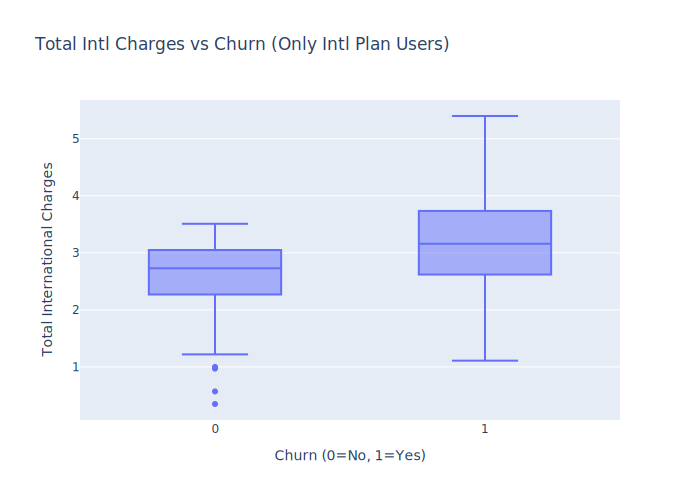

In [121]:
fig = px.box(
    intl_users,
    x='Churn',
    y='Total_intl_charge',
    title="Total Intl Charges vs Churn (Only Intl Plan Users)",
    labels={'Churn': 'Churn (0=No, 1=Yes)', 'Total_intl_charge': 'Total International Charges'}
)
fig.show()


### **Insights** :
##### **Among international plan users, churners show slightly higher total international charges than non-churners. This suggests that heavy international spenders are more likely to leave.****

### **Recommindation**:

#### **Competitors offering cheaper international rates could be pulling away these high-spending customers. To reduce churn, the company should consider discounted intl bundles or loyalty offers for heavy international users.**

# Multivariate analysis

## Does churn risk differ by Account length buckets (new vs. long-term) for customers with and without an International Plan?

In [122]:
df['International_plan'].value_counts()

International_plan
No     3010
Yes     323
Name: count, dtype: int64

In [123]:
df.Account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account_length, dtype: float64

In [124]:
df['Tenure_Bucket'] = pd.cut(
    df['Account_length'],
    bins=[1, 50, 150, df['Account_length'].max()],
    labels=['New', 'Mid', 'Long']   #(new (1- 50), Mid(51- 150), Long(150+))
)


df[['Account_length', 'Tenure_Bucket']].head()


,Account_length,Tenure_Bucket
0,128,Mid
1,107,Mid
2,137,Mid
3,84,Mid
4,75,Mid


/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_59353/3256410331.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



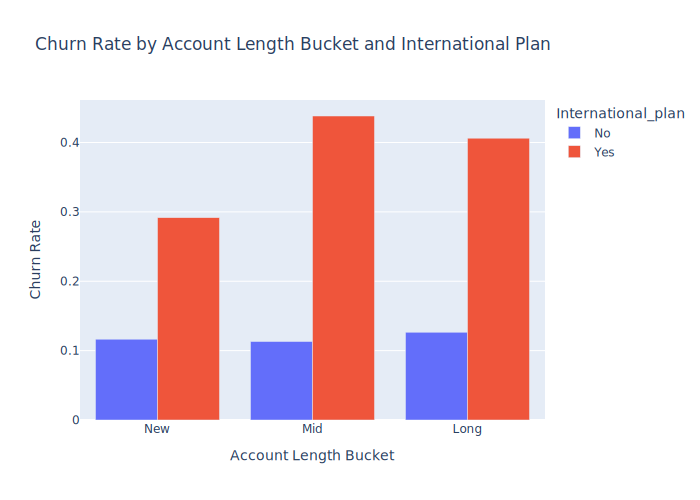

In [125]:
# Group by tenure bucket and plan type
tenure_plan_churn = (
    df.groupby(['Tenure_Bucket', 'International_plan'])['Churn']
    .mean()
    .reset_index()
)

# Plot
fig = px.bar(
    tenure_plan_churn,
    x='Tenure_Bucket',
    y='Churn',
    color='International_plan',
    barmode='group',
    title="Churn Rate by Account Length Bucket and International Plan",
    labels={'Churn': 'Churn Rate', 'Tenure_Bucket': 'Account Length Bucket'}
)
fig.show()


### **Insights:**

#### **- A cross all tenure buckets (New, Mid, Long), customers with an International Plan have much higher churn rates (~30–45%) compared to those without (~10–12%). The gap is consistent, showing that plan type is a stronger churn , and the number of international use service less than noon user by 300 user , so the churn by big amount for gust 300 user is very big problem**

#### **- Only 323 customers have an International Plan, while 3,010 do not. Even though this group is small, their churn is very high — so losing them is a big problem and indicate there are problem they have should be reviewd.**

### **Recommindations:**
#### **- These customers are high-value but at high risk. The company should focus on keeping them with better international pricing, loyalty offers, or special support.**

## - Does churn risk differ by Account length buckets for customers with and without an Voice mail plan Service?

In [126]:
df['Voice_mail_plan'].value_counts()

Voice_mail_plan
No     2411
Yes     922
Name: count, dtype: int64

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_59353/300348121.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



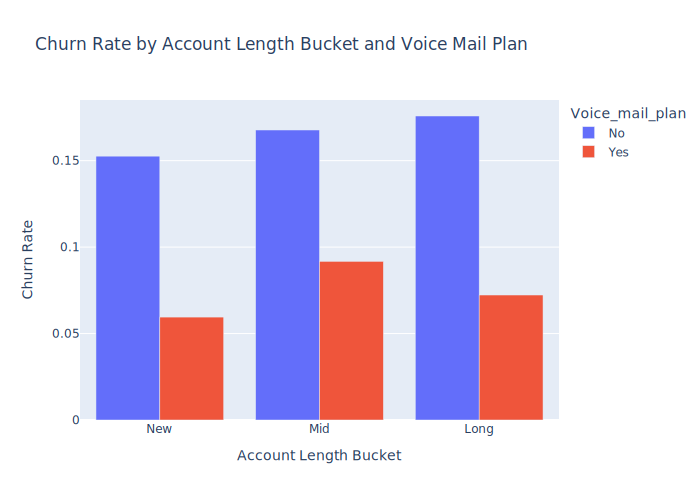

In [127]:
tenure_vm_churn = (
    df.groupby(['Tenure_Bucket', 'Voice_mail_plan'])['Churn']
    .mean()
    .reset_index()
)

fig = px.bar(
    tenure_vm_churn,
    x='Tenure_Bucket',
    y='Churn',
    color='Voice_mail_plan',
    barmode='group',
    title="Churn Rate by Account Length Bucket and Voice Mail Plan",
    labels={'Churn': 'Churn Rate', 'Tenure_Bucket': 'Account Length Bucket'}
)
fig.show()

### **Insights:**

#### **- Across all tenure buckets, customers with a Voice Mail Plan have much lower churn (~5–9%) compared to those without (~15–17%). The churn gap is consistent, meaning voicemail reduces churn regardless of how long the customer has been with the company.**

### **Recommindations:**

#### **- Adding or promoting Voice Mail Plans could be an effective retention strategy. It helps even new customers stay longer, and keeps long-term customers more engaged.**

## Check & Handling outliers

In [128]:
from datasist.structdata import detect_outliers

# Selecting numeric columns
columns = df.select_dtypes(include=['number']).columns

for column in columns:
    outliers = detect_outliers(df, 0, [column])
    print(f"Number of outliers in '{column}': {len(outliers)}")

Number of outliers in 'Account_length': 18
Number of outliers in 'Area_code': 0
Number of outliers in 'Number_vmail_messages': 1
Number of outliers in 'Total_day_minutes': 25
Number of outliers in 'Total_day_calls': 23
Number of outliers in 'Total_day_charge': 25
Number of outliers in 'Total_eve_minutes': 24
Number of outliers in 'Total_eve_calls': 20
Number of outliers in 'Total_eve_charge': 24
Number of outliers in 'Total_night_minutes': 30
Number of outliers in 'Total_night_calls': 22
Number of outliers in 'Total_night_charge': 30
Number of outliers in 'Total_intl_minutes': 46
Number of outliers in 'Total_intl_calls': 78
Number of outliers in 'Total_intl_charge': 49
Number of outliers in 'Customer_service_calls': 267
Number of outliers in 'Churn': 483


### - I won’t remove or change outliers because they show important customer behavior, like big spenders or frequent callers. Dropping them would lose key clues about churn. Instead, I’ll use tree-based models since they work well with outliers.

# Feature engineering

In [129]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn', 'Tenure_Bucket'],
      dtype='object')

## create derived columns to help model learn better.

## 1. Total Usage & Charges

In [130]:
df['Total_calls'] = df['Total_day_calls'] + df['Total_eve_calls'] + df['Total_night_calls'] + df['Total_intl_calls']

df['Total_minutes'] = df['Total_day_minutes'] + df['Total_eve_minutes'] + df['Total_night_minutes'] + df['Total_intl_minutes']

df['Total_charge'] = df['Total_day_charge'] + df['Total_eve_charge'] + df['Total_night_charge'] + df['Total_intl_charge']


#### Check distributions of feature we created

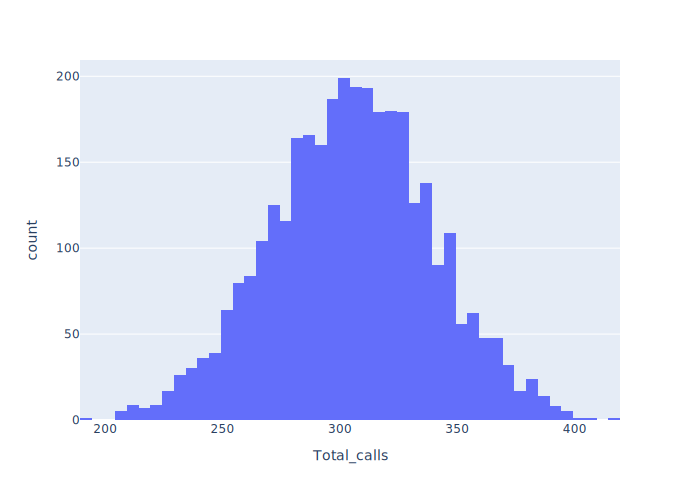

In [131]:
px.histogram(df, "Total_calls")

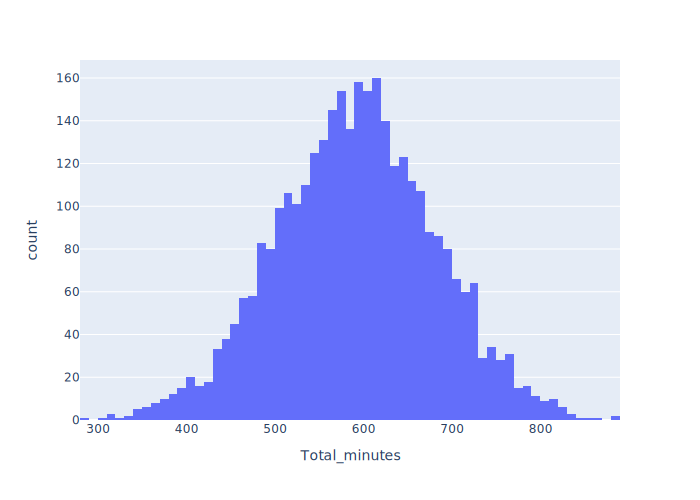

In [132]:
px.histogram(df, "Total_minutes") 

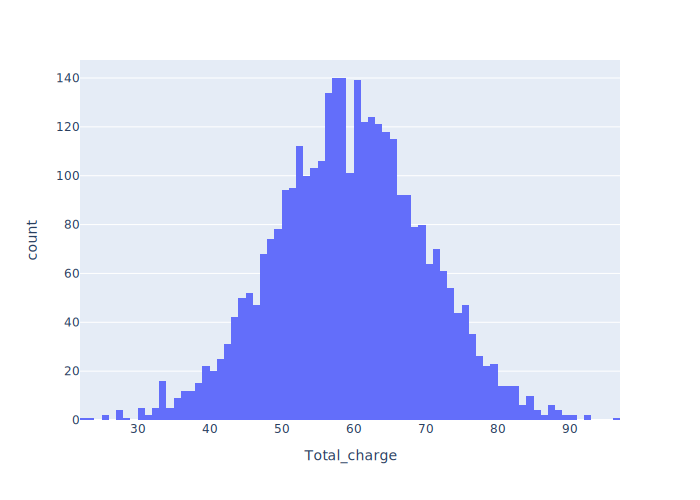

In [133]:
px.histogram(df, "Total_charge")

## 2. Average Call Duration

In [134]:
df['Avg_call_duration'] = df['Total_minutes'] / (df['Total_calls'].replace(0,1))

df["Avg_call_duration"].describe()

count    3333.000000
mean        1.964884
std         0.376958
min         0.798596
25%         1.705187
50%         1.939936
75%         2.195963
max         3.612245
Name: Avg_call_duration, dtype: float64

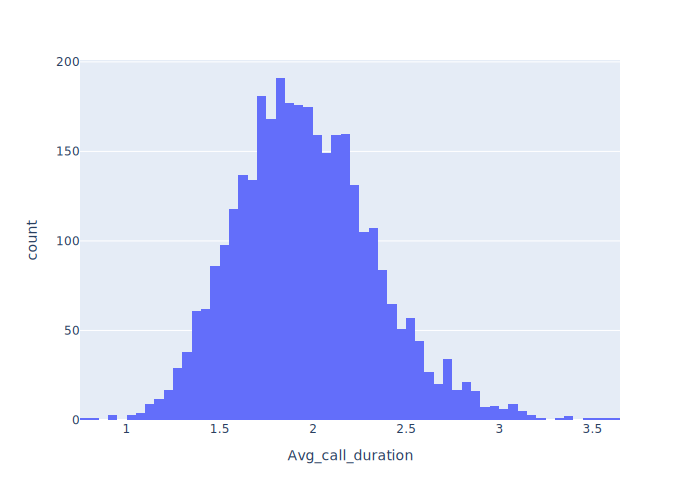

In [135]:
px.histogram(df, "Avg_call_duration")

### - Our analysis shows that customers with more than three service calls have a higher chance of churn so create this column

In [136]:
df['High_service_calls'] = (df['Customer_service_calls'] > 3).astype(int)
df.High_service_calls.describe()

count    3333.000000
mean        0.080108
std         0.271501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: High_service_calls, dtype: float64

In [137]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn', 'Tenure_Bucket', 'Total_calls', 'Total_minutes',
       'Total_charge', 'Avg_call_duration', 'High_service_calls'],
      dtype='object')

# Choose best and importan Feature

## this step will Filter features by choose important ones by (correlation and Extraclassifier )

## 1-corrolation

In [138]:
num_cols = df.select_dtypes(include='number').columns

# Compute correlation with 'Churn'
correlations = df[num_cols].corr()['Churn'].sort_values(ascending=False)

correlations

Churn                     1.000000
High_service_calls        0.311804
Total_charge              0.231549
Customer_service_calls    0.208750
Total_day_minutes         0.205151
Total_day_charge          0.205151
Total_minutes             0.198607
Avg_call_duration         0.144784
Total_eve_minutes         0.092796
Total_eve_charge          0.092786
Total_intl_charge         0.068259
Total_intl_minutes        0.068239
Total_night_charge        0.035496
Total_night_minutes       0.035493
Total_day_calls           0.018459
Account_length            0.016541
Total_calls               0.015807
Total_eve_calls           0.009233
Area_code                 0.006174
Total_night_calls         0.006141
Total_intl_calls         -0.052844
Number_vmail_messages    -0.089728
Name: Churn, dtype: float64

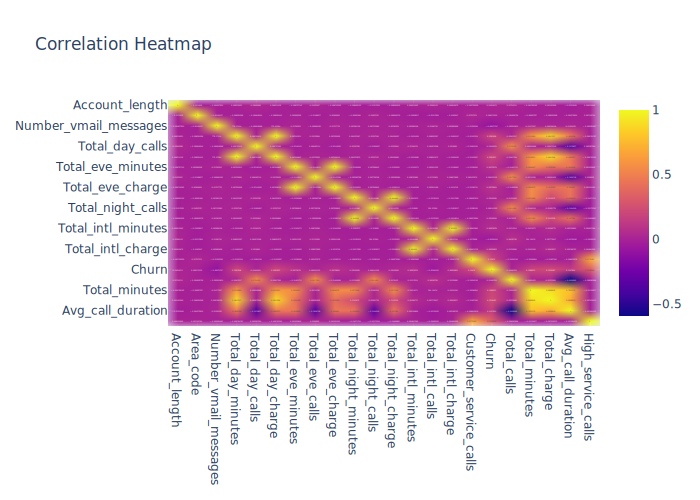

In [139]:
import plotly.express as px

# Step 1: Select only numerical columns from the DataFrame
num_df = df.select_dtypes(include="number")

# Step 2: Compute the correlation matrix
corr_matrix = num_df.corr()

# Step 3: Create the heatmap
fig = px.imshow(corr_matrix,
                text_auto=True,
                aspect="auto",
                title="Correlation Heatmap",
                width=1950,
                height=1100)

# Step 4: Show the figure
fig.show()


#### **as we see there are multictinary but i deleted columns that make multictinary،  model was bad when added them model were good so i wil focous on the based tree model they can Handle multictinary**

In [140]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn', 'Tenure_Bucket', 'Total_calls', 'Total_minutes',
       'Total_charge', 'Avg_call_duration', 'High_service_calls'],
      dtype='object')

## 2-ExtraTreesClassifier

In [141]:
"""
- Feature Importance Analysis by ExtraTreesClassifier -

This script prepares feature and evaluates feature importance
using an ExtraTreesClassifier.

Key Steps:
------------

1. Encode categorical features:
   - Map 'International_plan' and 'Voice_mail_plan' (Yes/No → 1/0).
   - Use Binary Encoding for 'State' (too many categories for One-Hot).

2. Combine encoded categorical and numeric usage features.

3. Train ExtraTreesClassifier:
   - Robust to outliers, no scaling needed.
   - Provides reliable feature importance.

4. Extract and sort feature importance to identify key drivers of churn.


Why ExtraTrees:
----------------
ExtraTrees (Extremely Randomized Trees) is a tree-based ensemble method that:
- Handles both numerical and categorical inputs after encoding.
- Is resistant to noise and outliers.
- Provides reliable estimates of feature importance, guiding feature selection
  and model refinement.

"""

## ------------------------- This explain coming code ----------------------------------- ##

"\n- Feature Importance Analysis by ExtraTreesClassifier -\n\nThis script prepares feature and evaluates feature importance\nusing an ExtraTreesClassifier.\n\nKey Steps:\n------------\n\n1. Encode categorical features:\n   - Map 'International_plan' and 'Voice_mail_plan' (Yes/No → 1/0).\n   - Use Binary Encoding for 'State' (too many categories for One-Hot).\n\n2. Combine encoded categorical and numeric usage features.\n\n3. Train ExtraTreesClassifier:\n   - Robust to outliers, no scaling needed.\n   - Provides reliable feature importance.\n\n4. Extract and sort feature importance to identify key drivers of churn.\n\n\nWhy ExtraTrees:\n----------------\nExtraTrees (Extremely Randomized Trees) is a tree-based ensemble method that:\n- Handles both numerical and categorical inputs after encoding.\n- Is resistant to noise and outliers.\n- Provides reliable estimates of feature importance, guiding feature selection\n  and model refinement.\n\n"

In [142]:
df_Cat = df.select_dtypes(include="object")

for col in df_Cat.columns :
    print(f"Column {col} has {df_Cat[col].nunique()} values")

Column State has 51 values
Column International_plan has 2 values
Column Voice_mail_plan has 2 values


####  **-encoding categorical columns to do see important of features using ExtraTreesClassifier**

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
from category_encoders import BinaryEncoder


df_encoded = df.copy()

# 1. Map column that has Yes/No to binary (1 ,0)
df_encoded['International_plan'] = df_encoded['International_plan'].map({'Yes': 1, 'No': 0})
df_encoded['Voice_mail_plan'] = df_encoded['Voice_mail_plan'].map({'Yes': 1, 'No': 0})


# 2. Binary encode for State column becouse columns has big number of features
encoder = BinaryEncoder(cols=['State'])
state_encoded = encoder.fit_transform(df_encoded[['State']])

# Drop original State and merge encoded
df_encoded = pd.concat([df_encoded.drop('State', axis=1), state_encoded], axis=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ordinal.py:210: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ordinal.py:210: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [144]:
df.select_dtypes(include=["int", "float64"]).columns

Index(['Account_length', 'Area_code', 'Number_vmail_messages',
       'Total_day_minutes', 'Total_day_calls', 'Total_day_charge',
       'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge',
       'Total_night_minutes', 'Total_night_calls', 'Total_night_charge',
       'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge',
       'Customer_service_calls', 'Churn', 'Total_calls', 'Total_minutes',
       'Total_charge', 'Avg_call_duration', 'High_service_calls'],
      dtype='object')

In [145]:
# 3. Feature sets
cat_cols = list(state_encoded.columns)

num_cols = [
'Account_length', 'Area_code', 'Number_vmail_messages',
       'Total_day_minutes', 'Total_day_calls', 'Total_day_charge',
       'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge',
       'Total_night_minutes', 'Total_night_calls', 'Total_night_charge',
       'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge',
       'Customer_service_calls', 'Total_calls', 'Total_minutes',
       'Total_charge', 'Avg_call_duration', 'High_service_calls'
]

X = df_encoded[cat_cols + num_cols]
y = df_encoded['Churn']

# 4. Fit ExtraTrees
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# 5. Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)


Total_charge              0.128693
High_service_calls        0.089300
Total_day_charge          0.078794
Total_minutes             0.072911
Total_day_minutes         0.072085
Customer_service_calls    0.052372
Number_vmail_messages     0.047804
Avg_call_duration         0.035261
Total_eve_minutes         0.031997
Total_eve_charge          0.030620
Total_intl_calls          0.028215
Total_intl_charge         0.028068
Total_intl_minutes        0.027601
Total_night_minutes       0.025731
Account_length            0.025411
Total_calls               0.025251
Total_night_calls         0.025113
Total_night_charge        0.024971
Total_day_calls           0.024566
Total_eve_calls           0.023016
Area_code                 0.020031
State_3                   0.015186
State_2                   0.014504
State_5                   0.013945
State_0                   0.013362
State_4                   0.013297
State_1                   0.011897
dtype: float64


### **I tested removing and add features and trained the model multiple times, tracking accuracy each time. This helped identify the best features for the final model, and thoose columns were found to be less important and less important in ExtraTreesClassifier**

In [146]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn', 'Tenure_Bucket', 'Total_calls', 'Total_minutes',
       'Total_charge', 'Avg_call_duration', 'High_service_calls'],
      dtype='object')

In [147]:
df.drop(['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 'Total_minutes'], axis= 1 , inplace= True)

In [148]:
df.drop(["Total_eve_calls", "Total_night_calls", "Total_calls", 'Total_day_calls', "Avg_call_duration", "Tenure_Bucket", "Area_code", "State" ], inplace= True, axis= 1)

In [149]:
df.duplicated().sum()

np.int64(0)

In [150]:
df.isna().sum()

Account_length            0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_charge          0
Total_eve_charge          0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
Total_charge              0
High_service_calls        0
dtype: int64

In [151]:
# see categorical columns before Modeling
cat_columns = df.select_dtypes(include=['object', "bool" ]).columns

# Print unique values for each categorical column
for col in cat_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)


Unique values in 'International_plan':
['No' 'Yes']
--------------------------------------------------
Unique values in 'Voice_mail_plan':
['Yes' 'No']
--------------------------------------------------


# Modeling

In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler , OrdinalEncoder , LabelEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from imblearn.combine import SMOTETomek



## Using Cross-Validation with Pipeline in Modeling

In [153]:
df.select_dtypes(include=['object']).columns

Index(['International_plan', 'Voice_mail_plan'], dtype='object')

In [154]:
df.select_dtypes(include=['int']).columns

Index(['Account_length', 'Number_vmail_messages', 'Total_intl_calls',
       'Customer_service_calls', 'Churn', 'High_service_calls'],
      dtype='object')

In [155]:
# to see column nededd to scaling
df.describe()

,Account_length,Number_vmail_messages,Total_day_charge,Total_eve_charge,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Total_charge,High_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,30.562307,17.083540,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,0.080108
std,39.822106,13.688365,9.259435,4.310668,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,0.271501
min,1.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,24.430000,14.160000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,0.000000
50%,101.000000,0.000000,30.500000,17.120000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,0.000000
75%,127.000000,20.000000,36.790000,20.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,0.000000
max,243.000000,51.000000,59.640000,30.910000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000,1.000000


In [156]:
cat_columns = [ "Voice_mail_plan", "International_plan" ]

num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Churn' in num_columns:
    num_columns.remove('Churn')


## try pipeline with initial model to testing pipline work or not

In [157]:
''''
Preprocessing Pipeline:
- cat: Apply OrdinalEncoder to categorical features (cat_columns).
- num_scaling: Apply RobustScaler to numeric features (num_columns)
  → using RobustScaler becouse it handles outliers
- remainder='passthrough': keep any other columns unchanged.

'''

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',  OrdinalEncoder(), cat_columns),
        ('num_scaling', RobustScaler(), num_columns )
    ],
    remainder='passthrough'
)

In [158]:
'''
Apply Pipeline with preprocessing and initial model for testing Pipeline

'''

steps = [
   ('preprocessing', preprocessor),
    ("LR", LogisticRegression())
]

pipeline = Pipeline(steps= steps)


In [159]:
# Features and target
x = df.drop("Churn", axis = 1 )

y = df["Churn"]

In [160]:
'''
Model Evaluation with Cross-Validation (testing to see every thing work or not :

'''

skf = StratifiedKFold( n_splits=5, shuffle=True, random_state=42 )

result = cross_validate(pipeline, x, y, cv= skf, scoring= "accuracy", return_train_score= True)


In [161]:
# result for initial model we do to check our pipline work or not
print(result["train_score"].mean())
print(result["test_score"].mean())

0.8457093463467104
0.8406832619726174


## pipline is working ,  Now try all models and take the best one in performance

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

### **Trying all models using cross validation and choose the best one for accuracy and recall**

In [163]:
models = [
        ("DT", DecisionTreeClassifier()) ,
        ("RF", RandomForestClassifier()),
        ("XGB", XGBClassifier())
]

In [164]:
# Target Value Count to Handle Imbalanced Data
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [165]:
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [166]:
#  This code handles the minority class using SMOTE tomec, After applying , it displays the resulting number of instances in both classes after aplying of 2 class how will be  .

from collections import Counter

print("Before:", Counter(y))
X_res, y_res = SMOTETomek(smote=SMOTE(sampling_strategy={1: 1820}, random_state=24)).fit_resample(X, y)
print("After SMOTETomek:", Counter(y_res))


Before: Counter({0: 2850, 1: 483})
After SMOTETomek: Counter({0: 2821, 1: 1791})


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [167]:
"""
This block of code evaluates multiple machine learning models using a pipeline approach that apply:

1- Preprocessing : applies transformations we do

2- SMOTETomek : balances the dataset by oversampling the minority class

3- Cross-validation: ensures fair evaluation

4- Scoring metrics : measures accuracy, recall, precision, for both training and test sets.

5- Results : prints average scores so we can compare model performance and detect overfitting.
"""

# scoring metrics for evaluation
scoring = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Iterate through all models to apply al steps
for model in models:
    # Build pipeline with preprocessing, SMOTETomek, and the model
    steps = [
   ('preprocessing', preprocessor),
   ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={1: 1820}, random_state=24))),
   (model)
]

    pipeline = Pipeline(steps= steps)  # Apply all pipeline steps and saved to use in CV

     # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
    result = cross_validate(pipeline, x, y, cv= skf, scoring= scoring, return_train_score= True)

    # Average recall
    print(f"{model[0]} Average Train Recall: {result['train_recall'].mean():.4f}")
    print(f"{model[0]} Average Test Recall: {result['test_recall'].mean():.4f}")

    # Average accuracy
    print(f"{model[0]} Average Train Accuracy: {result['train_accuracy'].mean():.4f}")
    print(f"{model[0]} Average Test Accuracy: {result['test_accuracy'].mean():.4f}")

    # Average precision
    print(f"{model[0]} Average Train Precision: {result['train_precision'].mean():.4f}")
    print(f"{model[0]} Average Test Precision: {result['test_precision'].mean():.4f}\n")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Framewo

DT Average Train Recall: 0.9943
DT Average Test Recall: 0.8592
DT Average Train Accuracy: 0.9988
DT Average Test Accuracy: 0.9376
DT Average Train Precision: 0.9974
DT Average Test Precision: 0.7518



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Framewo

RF Average Train Recall: 0.9938
RF Average Test Recall: 0.8529
RF Average Train Accuracy: 0.9990
RF Average Test Accuracy: 0.9766
RF Average Train Precision: 0.9995
RF Average Test Precision: 0.9835



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Framewo

XGB Average Train Recall: 0.9938
XGB Average Test Recall: 0.8572
XGB Average Train Accuracy: 0.9989
XGB Average Test Accuracy: 0.9766
XGB Average Train Precision: 0.9990
XGB Average Test Precision: 0.9790



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



### **chosing Rondom Forest as best model, there are some overfitting will handeled in tuning ,then saved model used in deployment by streamlit**

In [168]:
# pipline with our final model
steps = [
     ('preprocessing', preprocessor),
     ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={1: 1820}, random_state=24))),
     ("RF" ,  RandomForestClassifier())
]

pipeline = Pipeline(steps= steps)

In [169]:
RandomForestClassifier()

RandomForestClassifier()

# tuning

In [170]:
param_grid = {
    'RF__n_estimators': [250, 270, 300],
    'RF__max_depth': [9 , 10,  11],
    'RF__min_samples_split': [ 14, 15, 16 ],
    'RF__min_samples_leaf': [3, 4, 5]
} 

In [171]:
"""
Grid Search for Random Forest (focus on Recall)

Steps:
2. Use KFold cross-validation (5 splits, shuffled for randomness).
3. Run GridSearchCV with the pipeline and parameter grid.
   - scoring = both recall & accuracy
   - refit = 'recall' → best parameters chosen to maximize recall
4. Fit the grid search on (x, y) to find best hyperparameters.
"""

scorers = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

# Croos validation + GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
grid = GridSearchCV( estimator= pipeline, param_grid= param_grid, cv= skf, scoring= scorers, refit='recall',  return_train_score= True )


result = grid.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Framewo

In [172]:
result.best_params_

{'RF__max_depth': 9,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 14,
 'RF__n_estimators': 250}

## results

In [173]:
print(
    # Acc
    f"Train Acc: {result.cv_results_['mean_train_accuracy'][result.best_index_]:.4f} | "
    f"Test Acc: {result.cv_results_['mean_test_accuracy'][result.best_index_]:.4f} | "

    # recall
    f"Train Recall: {result.cv_results_['mean_train_recall'][result.best_index_]:.4f} | "
    f"Test Recall: {result.cv_results_['mean_test_recall'][result.best_index_]:.4f} | "

      # Precision
    f"Train Precision: {result.cv_results_['mean_train_precision'][result.best_index_]:.4f} | "
    f"Test Precision: {result.cv_results_['mean_test_precision'][result.best_index_]:.4f}"
)


Train Acc: 0.9805 | Test Acc: 0.9778 | Train Recall: 0.8659 | Test Recall: 0.8592 | Train Precision: 0.9994 | Test Precision: 0.9859


### **Final model with all things (preprocessing + Best model + tuning ) , ready to production**

In [174]:
# Set the pipeline parameters to the best parameters found from hyperparameter tuning
pipeline.set_params(**result.best_params_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Voice_mail_plan',
                                                   'International_plan']),
                                                 ('num_scaling', RobustScaler(),
                                                  ['Account_length',
                                                   'Number_vmail_messages',
                                                   'Total_day_charge',
                                                   'Total_eve_charge',
                                                   'Total_night_charge',
                                                   'Total_intl_minutes',
                                                   'Total_intl_calls',
                                                   'Total_intl_charge',
                                                   'Customer_service_calls',
                                                   'Total_charge',
                                                   'High_service_calls'])])),
                ('SmoteTomek',
                 SMOTETomek(smote=SMOTE(random_state=24,
                                        sampling_strategy={1: 1820}))),
                ('RF',
                 RandomForestClassifier(max_depth=9, min_samples_leaf=3,
                                        min_samples_split=14,
                                        n_estimators=250))])

In [175]:
# Train the final pipeline with best parameter and model and preprocessing 
Final_Model = pipeline.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [176]:
# Extract the trained Random Forest model from the pipeline
rf_model = Final_Model.named_steps["RF"]

# Get the final feature names after preprocessing 
feature_names = Final_Model.named_steps["preprocessing"].get_feature_names_out()


### **Feature importance of model**

In [177]:
# Feature importance score in the trained Random Forest model
feature_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importances.head(20)

,Feature,Importance
11,num_scaling__Total_charge,0.311796
1,cat__International_plan,0.155331
4,num_scaling__Total_day_charge,0.111877
10,num_scaling__Customer_service_calls,0.107448
12,num_scaling__High_service_calls,0.097675
8,num_scaling__Total_intl_calls,0.056244
5,num_scaling__Total_eve_charge,0.028997
3,num_scaling__Number_vmail_messages,0.027623
0,cat__Voice_mail_plan,0.026010
7,num_scaling__Total_intl_minutes,0.024929


In [178]:
df.columns 

Index(['Account_length', 'International_plan', 'Voice_mail_plan',
       'Number_vmail_messages', 'Total_day_charge', 'Total_eve_charge',
       'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls',
       'Total_intl_charge', 'Customer_service_calls', 'Churn', 'Total_charge',
       'High_service_calls'],
      dtype='object')

In [179]:
df.describe()

,Account_length,Number_vmail_messages,Total_day_charge,Total_eve_charge,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Total_charge,High_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,30.562307,17.083540,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,0.080108
std,39.822106,13.688365,9.259435,4.310668,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,0.271501
min,1.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,24.430000,14.160000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,0.000000
50%,101.000000,0.000000,30.500000,17.120000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,0.000000
75%,127.000000,20.000000,36.790000,20.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,0.000000
max,243.000000,51.000000,59.640000,30.910000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000,1.000000


In [180]:
import joblib

In [181]:
# Save the final model to a .joblib file
# joblib.dump(Final_Model, "/Users/mohammedmahmood/Desktop/Data projects/Data science/Telecome_Churn_Prediction.joblib")
